In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud #词云图
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer #词袋模型自然语言
from sklearn.feature_extraction.text import TfidfVectorizer#TF-IDF自然语言

In [5]:
text_ana = pd.read_csv(r'E:\[- -] C\文本数据分析\上课实例\text_analysis_twitter.csv',index_col=0)
text_ana

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


In [3]:
import re

def preprocess_text(text):    
    # 转换为小写
    text = text.lower()   
    # 移除URL
    text = re.sub(r'http\S+', '', text)    
    return text

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (300000, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [7]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('the', 247160),
 ('to', 235370),
 ('of', 112428),
 ('in', 104912),
 ('and', 104025),
 ('for', 102100),
 ('rt', 83461),
 ('on', 72986),
 ('amp', 65500),
 ('is', 64785),
 ('we', 53564),
 ('our', 49736),
 ('this', 45532),
 ('you', 40235),
 ('with', 39027),
 ('it', 38749),
 ('that', 38161),
 ('qt', 35691),
 ('at', 33821),
 ('are', 31301),
 ('will', 29565),
 ('tax', 28529),
 ('my', 27644),
 ('be', 26920),
 ('from', 26202),
 ('today', 24574),
 ('have', 23005),
 ('by', 22865),
 ('more', 22665),
 ('trump', 19894),
 ('bill', 19534),
 ('their', 19129),
 ('about', 18973),
 ('as', 18391),
 ('all', 18295),
 ('not', 18197),
 ('your', 17615),
 ('who', 17098),
 ('can', 15465),
 ('health', 14215),
 ('has', 14119),
 ('an', 13861),
 ('they', 13858),
 ('us', 13825),
 ('here', 13799),
 ('house', 13680),
 ('people', 13486),
 ('great', 13468),
 ('now', 13113),
 ('families', 12838),
 ('must', 12787),
 ('up', 12602),
 ('was', 12513),
 ('need', 12313),
 ('americans', 12279),
 ('help', 12145),
 ('act', 12064),

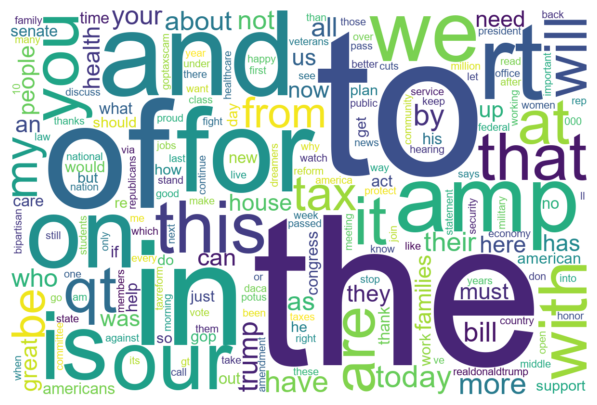

<Figure size 640x480 with 0 Axes>

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='arial.ttf'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)

## 中文

In [9]:
text_ana = pd.read_csv(r'E:\[- -] C\文本数据分析\上课实例\text_analysis_weibo.csv',index_col=0)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [10]:
# 分析语料
text = list(text_ana['标题/微博内容'])
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

In [11]:
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100].astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BITTER~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.591 seconds.
Prefix dict has been built successfully.


0    # 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言...
1                                                 转发 C
2    【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能...
3    丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程...
4        诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！
Name: 标题/微博内容, dtype: object

In [12]:
text = list(text_ana['标题/微博内容'].dropna())
text

['# 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言 自 在 人心   \u200b \u200b',
 '转发 C',
 '【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能 唱 跳 不 设限 ， 运动 联 濛 开 新年 🇨 🇳   期待 全能 音乐 人 @ 刘雨昕   与 # 运动 者 联 濛 # 一起 ， 为 冬奥 赛事 助力 加油 ！ 】',
 '丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程鑫   二十 成金筑梦鑫 世界 #   大年初一 锁定 @ 北京 卫视   和 门面 主舞 @ 时代 少年 团 - 丁程鑫   一起 过大年 ， 拥抱 冰雪 ， 致敬 冬奥 ！',
 '诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！',
 '转发 C',
 '# 熊猫 守护者 ## 全面 二 创冰墩 墩 # 北京 冬奥会 如火如荼 地 进行 中 ， 滚滚 我 的 好 朋友 冰墩 墩 也 十分 活跃 ， 看 滚滚 我 做 一组 舒展 运动 ， 为 中国 健儿 加油 鼓 劲儿 ！ [ 嘻嘻 ] [ 嘻嘻 ]   http : / / t . cn / A6ilerDZ   视频 来源 ： @ 桃花源 生态 保护 基金会   \u200b \u200b \u200b',
 '转发 C',
 '2022 北京 冬奥会 加油 ！ 冰墩 墩 雪容融 也 非常 可爱 ！ 期待 我国 奥运健儿 们 的 精彩 表现 [ 开学 季 ] # 云 支教 迎 冬奥 #   \u200b \u200b',
 '和 @ TFBOYS - 易 烊 千玺   一起 助力 东奥 ！ 一起 向 未来 ！',
 '转发 C',
 '[ 心 ]',
 '守护 [ 心 ]',
 '# 易 烊 千玺 邀 你 唱响 一起 向 未来 #   / / @ M28 号 星球 : # 易 烊 千玺 邀 你 唱响 一起 向 未来 #   26.17',
 '/ / @ 翔霖 神谕 : 感谢 @ 爱奇艺   的 分享 。 新年 胜 旧年 ， 春妍 惹 绚烂 ， 万事 胜意 与 平安 喜乐 的 祝福 徒增 和 乐 ， @ 时代 少年 团 - 严浩翔   @ 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 602)


In [14]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['0414' '1020' '167' '17' '18' '19' '2022' '25' '26' '50' 'a669n33f'
 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2' 'a6igrcur' 'a6ikvewj'
 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2' 'a6mn51qh' 'a6xwbtdu' 'an35'
 'c2021' 'call' 'cn' 'cosmo' 'cosmo5' 'cup' 'heytea' 'http' 'into1' 'kiki'
 'liveshow' 'lm' 'm28' 'mv' 'rap' 'tfboys' 'to19' 'um' 'vocal' 'wzy'
 'yyds' '一个' '一休' '一天' '一定' '一封' '一届' '一张' '一日' '一片' '一种' '一组' '一起' '一辈子'
 '丁哥' '丁程鑫' '万事' '万里' '三珩' '不仅' '不停' '不是' '不畏' '不要' '不要脸' '不语' '世界' '东奥'
 '东方' '东西' '东进' '严浩翔' '中华' '中国' '中国画' '中国队' '中央美术学院' '丰富多彩' '主舞' '之后' '之火'
 '之约' '之美' '了解' '二十' '产生' '京东' '人心' '人生' '什么' '他们' '代入' '代表团' '代言' '代言人'
 '以此' '休息' '优秀' '会长' '传播' '位列' '位送' '低沉' '你们' '你好' '便是' '保护' '信号' '健儿'
 '兄弟' '全能' '全面' '公道' '六个' '共祝' '关心' '关注' '关键' '其中' '养乐多' '兼好' '再说' '写下'
 '冠军' '冬天' '冬奥' '冬奥会' '冬季' '冬日' '冬梦之约' '冰墩' '冰壶' '冰雪' '准时' '凝聚' '出演'
 '出言不逊' '分享' '刘耀文' '刘雨昕' '刚刚开始' '创冰墩' '前辈' '加油' '加盟' '助力' '助威' '助阵' '努力'
 '劲儿' '勇士' '北京' '十八' '十八岁' '十六个' '十分' '十大' '千玺' '单人滑' '单届' 

In [ ]:
list(X.toarray())

In [15]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [16]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

602

In [17]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('转发', 33),
 ('冬奥', 30),
 ('一起', 29),
 ('北京', 25),
 ('刘雨昕', 20),
 ('运动', 18),
 ('加油', 17),
 ('少年', 14),
 ('cn', 13),
 ('http', 13),
 ('冬奥会', 12),
 ('未来', 12),
 ('冰雪', 11),
 ('健儿', 10),
 ('宋亚轩', 10),
 ('时代', 10),
 ('call', 9),
 ('期待', 8),
 ('中国', 7),
 ('全能', 6),
 ('分享', 6),
 ('徐坤', 6),
 ('我们', 6),
 ('超话', 6),
 ('into1', 5),
 ('丁程鑫', 5),
 ('冰墩', 5),
 ('努力', 5),
 ('周深', 5),
 ('感谢', 5),
 ('林墨', 5),
 ('真的', 5),
 ('自己', 5),
 ('金牌', 5),
 ('音乐', 5),
 ('关注', 4),
 ('助力', 4),
 ('卫视', 4),
 ('后援会', 4),
 ('唱响', 4),
 ('尹浩宇', 4),
 ('新年', 4),
 ('春晚', 4),
 ('朱一龙', 4),
 ('李宇春', 4),
 ('歌手', 4),
 ('温柔', 4),
 ('致敬', 4),
 ('赛场', 4),
 ('19', 3),
 ('一定', 3),
 ('不是', 3),
 ('千玺', 3),
 ('卡布', 3),
 ('可以', 3),
 ('声音', 3),
 ('奥运健儿', 3),
 ('官方', 3),
 ('害羞', 3),
 ('张哥', 3),
 ('日常', 3),
 ('时间', 3),
 ('明星', 3),
 ('涵江', 3),
 ('照亮', 3),
 ('照顾', 3),
 ('燕京啤酒', 3),
 ('生日', 3),
 ('直播', 3),
 ('相信', 3),
 ('相约', 3),
 ('祝福', 3),
 ('罗一舟', 3),
 ('视频', 3),
 ('觉得', 3),
 ('赛事', 3),
 ('越来越', 3),
 ('进行', 3),
 ('一个', 2),
 ('一辈子', 2),
 (

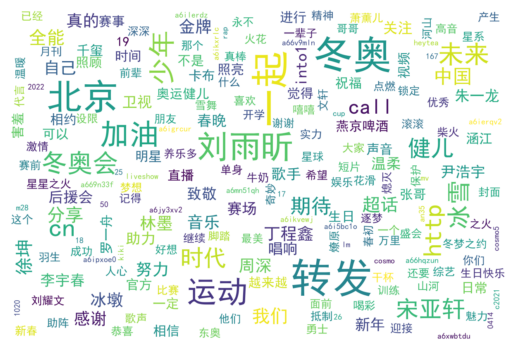

In [18]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()